In [15]:
import os
import pickle 
import sys
import pandas as pd
from collections import Counter
from Bio import SeqIO, pairwise2 
import diverse_yeast_tools as dyt
import matplotlib.pyplot as plt
  

y1000plus_dir = os.path.normpath('C:/Users/heineib/Documents/GitHub/y1000plus_tools/data') + os.sep
#base_dir = os.path.normpath('G:/My Drive/Crick_LMS/projects/diverse_yeasts')

base_dir = os.path.normpath('G:/My Drive/Crick_LMS/projects/diverse_yeasts/alphafold')

proteomics_dir = os.path.normpath('G:/My Drive/Crick_LMS/projects/diverse_yeasts/proteomics')

##Need to add something for S. cer
shen_proteome_dir = os.path.normpath(y1000plus_dir + 'shen_2018_data/0_332yeast_genomes/332_genome_annotations/pep') + os.sep 
uniprot_proteome_dir = os.path.normpath('G:/My Drive/Crick_LMS/external_data/genomes/diverse_yeast/proteomes') + os.sep 


# #Load y1000 species table
# y1000_species = pd.read_csv(y1000plus_dir + os.path.normpath("y1000plus_tools_data/y1000plus/y1000_species_table.csv"), index_col=0)

species_selection = pd.read_csv(base_dir + os.sep + os.path.normpath('selected_proteins/species_selection/species_selection.csv' ))







#spec_orig_genome_lookup = dict(zip(y1000_species['spec_og_id'], y1000_species['original_genome_id']))


# #Load S.Cer lookup table: 
# scer_lookup_fname = y1000plus_dir + os.path.normpath('y1000plus_tools_data/y1000plus/id_lookups/saccharomyces_cerevisiae.csv')

# scer_lookup = pd.read_csv(scer_lookup_fname, index_col=0)
# scer_y1000_id_gene_id_lookup = dict(zip(scer_lookup['y1000_id'], scer_lookup.index))



#The script for the proteomes for which we had proteomic data may use functions from y1000plus and yeast_esr_exp library

# # if yeast_esr_flag =='Y':
# yeast_esr_exp_path = os.path.normpath('C:/Users/heineib/Documents/GitHub/yeast_esr_expression_analysis') + os.sep
# #io_library_path_core = io_library_path + 'core' + os.sep
# if not(yeast_esr_exp_path in sys.path):
#     sys.path.append(yeast_esr_exp_path)
#     print("Added " + yeast_esr_exp_path + " to path" )

# import yeast_esr_exp
# yeast_esr_exp.base_dir = yeast_esr_exp_path
# yeast_esr_exp.data_processing_dir = yeast_esr_exp_path + os.path.normpath('expression_data') + os.sep


# y1000plus_tools_flag = input("Use y1000plus_tools functions? (Y/n)")

# # if y1000plus_tools_flag =='Y':
# y1000plus_tools_path = os.path.normpath('C:/Users/heineib/Documents/GitHub/y1000plus_tools') + os.sep
# #io_library_path_core = io_library_path + 'core' + os.sep
# if not(y1000plus_tools_path in sys.path):
#     sys.path.append(y1000plus_tools_path)
#     print("Added " + y1000plus_tools_path + " to path" )

# import y1000plus_tools
# y1000plus_tools.base_dir = os.path.normpath('C:/Users/heineib/Documents/GitHub/y1000plus_tools') + os.sep
# print("y1000plus_tools dir is " + y1000plus_tools.base_dir )                      
# y1000plus_tools.y1000plus_dir = y1000plus_tools.base_dir + 'data' + os.sep 
# print("y1000plus data dir is " + y1000plus_tools.y1000plus_dir)







In [ ]:
#Save mapping files for each species in the diverse yeast proteomics dataset.  Maps from 
#Also saves log file for numbers of ids found and lists multimappers. 


#pairwise_scores originally calculated in 20211025_alphafold_selection.ipynb
pairwise_scores_fname = base_dir  + os.sep + 'pairwise_scores.pkl'
# Load pairwise_scores
with open(pairwise_scores_fname, 'rb') as f: 
    pairwise_scores = pickle.load(f)

    
#Load proteomics Dataset
combined_data = pd.read_csv(proteomics_dir + os.sep + os.path.normpath('220811/220811_Diverse_species_SF08_6h_CN1_woSlowGrowth.csv'), index_col=0)



#D. hansenii and H. osmophilia  missing from 220811_Diverse_species_SF08_6h_CN1_woSlowGrowth.csv?
spec_abbrev_map = {'BY': 'saccharomyces_cerevisiae', 
                   'SC': 'saccharomyces_cerevisiae', 
                   'CA': 'candida_albicans', 
                   'CT': 'candida_tropicalis', 
                   'KL': 'kluyveromyces_lactis', 
                   'KM': 'kluyveromyces_marxianus', 
                   'LT': 'lachancea_thermotolerans',
                   'PP': 'komagataella_pastoris', 
                   'WA': 'wickerhamomyces_anomalus', 
                   'ZR': 'zygosaccharomyces_rouxii'
                  }

#(species genome name: (shen_fname, uniprot_fname)): 
proteome_fasta_dict = {'kluyveromyces_lactis': {'shen': shen_proteome_dir + 'kluyveromyces_lactis.max.pep', 
                                                'uniprot': uniprot_proteome_dir + 'Klac_uniprot-proteome_UP000000598.fasta'
                                               }, 
                       'wickerhamomyces_anomalus': {'shen': shen_proteome_dir + 'wickerhamomyces_anomalus.max.pep',
                            'uniprot': uniprot_proteome_dir + 'Wano_uniprot-proteome_UP000094112.fasta'
                           }, 
                       'lachancea_thermotolerans': {'shen': shen_proteome_dir + 'lachancea_thermotolerans.max.pep',
                            'uniprot': uniprot_proteome_dir + 'Lthe_uniprot-proteome_UP000002036.fasta'
                           }, 
                       'komagataella_pastoris': {'shen': shen_proteome_dir + 'komagataella_pastoris.max.pep',
                            'uniprot': uniprot_proteome_dir + 'Kpas_uniprot-proteome_UP000000314.fasta'
                           }, 
                        'candida_tropicalis': {'shen': shen_proteome_dir + 'candida_tropicalis.max.pep',
                            'uniprot': uniprot_proteome_dir + 'Ctro_uniprot-proteome_UP000002037.fasta'
                           },
                        'debaryomyces_hansenii': {'shen': shen_proteome_dir + 'debaryomyces_hansenii.max.pep',
                            'uniprot': uniprot_proteome_dir + 'Dhan_uniprot-proteome_UP000000599.fasta'
                           }, 
                        'yHMPu5000034957_hanseniaspora_osmophila_160519': {'shen': shen_proteome_dir + 'yHMPu5000034957_hanseniaspora_osmophila_160519.max.pep',
                            'uniprot': uniprot_proteome_dir + 'Hosm_uniprot-proteome_UP000095728.fasta'
                           }, 
                        'kluyveromyces_marxianus': {'shen': shen_proteome_dir + 'kluyveromyces_marxianus.max.pep',
                            'uniprot': uniprot_proteome_dir + 'Kmar_uniprot-proteome_UP000065495.fasta'
                           }, 
                        'zygosaccharomyces_rouxii': {'shen': shen_proteome_dir + 'zygosaccharomyces_rouxii.max.pep',
                            'uniprot': uniprot_proteome_dir + 'Zrou_uniprot-proteome_UP000008536.fasta'
                           }, 
                        'saccharomyces_cerevisiae': {'uniprot': uniprot_proteome_dir + 'Scer_uniprot-proteome_UP000002311.fasta'}
                      }


fname_log = proteomics_dir + os.sep + os.path.normpath('220811/uniprot_2_y1000id_log.txt')


with open(fname_log,'w') as f_log: 
    for spec_abbrev, spec in spec_abbrev_map.items():
        #Skipping S. cer because I don't have pairwise scores for that
        if not(spec_abbrev in {'SC', 'BY', 'CA'}): 
               #spec_abbrev = 'KL' 
            #spec = spec_abbrev_map[spec_abbrev]
            fname_out = proteomics_dir + os.sep + os.path.normpath('220811/uniprot_2_y1000id_' + spec_abbrev + '.csv')


            #Load map from full name to shen identifier 

            spec_lookup_fname = y1000plus_dir +  os.path.normpath('y1000plus_tools_data/y1000plus/id_lookups/' + spec + '.csv')
            spec_lookup = pd.read_csv(spec_lookup_fname, index_col=0)

            shen_full_2_y1000_id = dict(zip(spec_lookup['gene_full'], spec_lookup['y1000_id']))

            #Make Dictionary from pairwise scores
            pairwise_scores_spec = pairwise_scores[spec]

            sim_score_high_thresh = 75
            sim_score_low_thresh = 60
            sim_score_diff_thresh = 8

            shen_full_2_uniprot = {}

            f_log.write('Species: ' + spec + '\n')

            for shen_full, scores in pairwise_scores_spec.items(): 

                #shen_full = 'augustus_masked-CR382121-processed-gene-0.43'
                #scores = pairwise_scores_spec[shen_full]

                scores_sorted = scores.sort_values(ascending=False)
                maxval = scores_sorted[0]
                diff_top2_val = maxval - scores_sorted[1]

                if ((maxval>sim_score_high_thresh) | ((maxval>sim_score_low_thresh) & (diff_top2_val>sim_score_diff_thresh))): 
                    uniprot_id = scores_sorted.index[0].split('|')[1]  #The id looks like tr|<ID>|<name_specabbrev>, so we only extract the middle id

                else: 
                    f_log.write('No clear uniprot match: ' + shen_full)
                    uniprot_id = None

                shen_full_2_uniprot[shen_full] = uniprot_id



            f_log.write('Shen IDs in selected OGs: ' + str(len(pairwise_scores_spec)) + '\n')
            shen_mapped = [value for value in shen_full_2_uniprot.values() if value != None]
            f_log.write('Shen IDs mapped to uniprot: ' + str(len(shen_mapped)))
            if len(shen_mapped)==len(set(shen_mapped)):
                f_log.write('One shen ID mapped to multiple Uniprot IDs\n')
                f_log.write('Duplicate Uniprot IDs: \n')
                for name, count in Counter(shen_mapped).items(): 
                    if count>1: 
                        f_log.write(name + '\n')

            #check how many shen_ids are missing
            f_log.write('total Shen IDs: ' + str(len(spec_lookup))+ '\n')
            assert len(set(shen_full_2_uniprot.keys()) - set(spec_lookup['gene_full']))==0, 'Some unidentifed shen ids'
            f_log.write('Shen IDs not mapped from og score matrix: ' + str(len(set(spec_lookup['gene_full']) - set(shen_full_2_uniprot.keys())))+ '\n')

            #Check how many uniprot ids are missing
            uniprot_ids = []
            uniprot_fasta = SeqIO.parse(proteome_fasta_dict[spec]['uniprot'], "fasta")
            for seq in uniprot_fasta: 
                name = seq.name
                uniprot_ids.append(name.split('|')[1])

            f_log.write('Total Uniprot IDs: ' +  str(len(uniprot_ids))+ '\n')
            assert len(set(shen_full_2_uniprot.values()) - (set(uniprot_ids) | {None}))==0, 'Some unidentifed Uniprot IDs'
            f_log.write('Uniprot IDs not mapped from og score matrix: ' + str(len(set(uniprot_ids) - set(shen_full_2_uniprot.values())))+ '\n')

            #Check how many uniprot ids are missing from Federica's data (assert none)
            data_uniprot_ids = combined_data.loc[combined_data['Species']==spec_abbrev, :]['Protein.Ids'] 
            f_log.write('Uniprot IDs in data: ' + str(len(set(data_uniprot_ids)))+ '\n')

            #Check how many from federica's data set map to shen ids
            f_log.write('Uniprot IDs in data that map to OG proteins: ' + str(len(set(data_uniprot_ids) & set(shen_full_2_uniprot.values())  ))+ '\n')





            #Make dictionary of Uniprot id to shen identifer 

            uniprot_id_2_y1000_id_spec = {}

            with open(fname_out, 'w') as f_out: 
                for key, value in shen_full_2_uniprot.items(): 
                    if value != None: 
                        uniprot_id_2_y1000_id_spec[value] = shen_full_2_y1000_id[key]
                        f_out.write(value + ', ' + shen_full_2_y1000_id[key] +'\n')

In [ ]:
## Routine to calculate pairwise scores for proteins for which we had a proteome

# #Find matches comparing shen and uniprot proteome. 

# #Only need to redo this if you are re-calculating pairwise_scores

# shen_proteome_dir = os.path.normpath(y1000plus_dir + 'shen_2018_data/0_332yeast_genomes/332_genome_annotations/pep') + os.sep 
# uniprot_proteome_dir = os.path.normpath('C:/Users/heineib/Google Drive/Crick_LMS/external_data/genomes/diverse_yeast/proteomes') + os.sep 

# #(orig_genome ame: (shen_fname, uniprot_fname)): 
# proteome_fasta_dict = {'kluyveromyces_lactis': {'shen': shen_proteome_dir + 'kluyveromyces_lactis.max.pep', 
#                                                 'uniprot': uniprot_proteome_dir + 'Klac_uniprot-proteome_UP000000598.fasta'
#                                                }, 
#                        'wickerhamomyces_anomalus': {'shen': shen_proteome_dir + 'wickerhamomyces_anomalus.max.pep',
#                             'uniprot': uniprot_proteome_dir + 'Wano_uniprot-proteome_UP000094112.fasta'
#                            }, 
#                        'lachancea_thermotolerans': {'shen': shen_proteome_dir + 'lachancea_thermotolerans.max.pep',
#                             'uniprot': uniprot_proteome_dir + 'Lthe_uniprot-proteome_UP000002036.fasta'
#                            }, 
#                        'komagataella_pastoris': {'shen': shen_proteome_dir + 'komagataella_pastoris.max.pep',
#                             'uniprot': uniprot_proteome_dir + 'Kpas_uniprot-proteome_UP000000314.fasta'
#                            }, 
#                         'candida_tropicalis': {'shen': shen_proteome_dir + 'candida_tropicalis.max.pep',
#                             'uniprot': uniprot_proteome_dir + 'Ctro_uniprot-proteome_UP000002037.fasta'
#                            },
#                         'debaryomyces_hansenii': {'shen': shen_proteome_dir + 'debaryomyces_hansenii.max.pep',
#                             'uniprot': uniprot_proteome_dir + 'Dhan_uniprot-proteome_UP000000599.fasta'
#                            }, 
#                         'yHMPu5000034957_hanseniaspora_osmophila_160519': {'shen': shen_proteome_dir + 'yHMPu5000034957_hanseniaspora_osmophila_160519.max.pep',
#                             'uniprot': uniprot_proteome_dir + 'Hosm_uniprot-proteome_UP000095728.fasta'
#                            }, 
#                         'kluyveromyces_marxianus': {'shen': shen_proteome_dir + 'kluyveromyces_marxianus.max.pep',
#                             'uniprot': uniprot_proteome_dir + 'Kmar_uniprot-proteome_UP000065495.fasta'
#                            }, 
#                         'zygosaccharomyces_rouxii': {'shen': shen_proteome_dir + 'zygosaccharomyces_rouxii.max.pep',
#                             'uniprot': uniprot_proteome_dir + 'Zrou_uniprot-proteome_UP000008536.fasta'
#                            }
#                       }

# study1 = 'shen'
# study2 = 'uniprot'

# match_points = 1
# mismatch_points = -1
# gap_open = -.5
# gap_extension = -0.1
# NN_top_scores = 5
# penalize_end_gaps = True 


# pairwise_scores = {}
# spec_orig_genomes = list[proteome_fasta_dict.keys()]#[ 'yHMPu5000034957_hanseniaspora_osmophila_160519']  #'zygosaccharomyces_rouxii','kluyveromyces_marxianus','candida_tropicalis', 'debaryomyces_hansenii',

# for spec_orig_genome in spec_orig_genomes:
#     print(spec_orig_genome)
#     #spec_orig_genome = 'komagataella_pastoris'# 'lachancea_thermotolerans' #'wickerhamomyces_anomalus' # 'kluyveromyces_lactis'

#     use_subset = True
#     subset = set(gene_full_sets[spec_orig_genome])
#     pairwise_score_loaded = False #if you have already saved some and want to do the rest

#     # #Check timing with time module
#     # #python parallel programming library
#     # #ipy_parallel dask
#     # #https://ipyparallel.readthedocs.io/en/stable/development/messages.html#parallel-messages

#     # #All by all pairwise sequence alignment, output top NN results

#     genenames_study1 = []
#     AA_seqs_study1 = SeqIO.parse(proteome_fasta_dict[spec_orig_genome][study1], "fasta")
#     for seq_study1 in AA_seqs_study1: 
#         genename_study1 = dyt.gene_id_retrieve(study1, seq_study1)
#     #     if spec=='Smik': 
#     #         genename_study1_dash = genename_study1
#     #         genename_study1 = 'smik' + genename_study1_dash.split('smik_')[1]
#         genenames_study1.append(genename_study1)

#     if use_subset: 
#         print('Using Subset genes')
#     else: 
#         subset = set(genenames_study1)

#     if pairwise_score_loaded: 
#         genes_to_search = ((subset & set(genenames_study1)) - set(pairwise_score.keys()))
#     else: 
#         pairwise_score = {}
#         genes_to_search = (subset & set(genenames_study1))


#     AA_seqs_study1 = SeqIO.parse(proteome_fasta_dict[spec_orig_genome][study1], "fasta")


#     N = len(genes_to_search)
#     for seq_study1 in AA_seqs_study1: 
#         check_gene = False
#         genename_study1 = dyt.gene_id_retrieve(study1, seq_study1)
#     #     if spec=='Smik': 
#     #         genename_study1_dash = genename_study1
#     #         genename_study1 = 'smik' + genename_study1_dash.split('smik_')[1]
#         if genename_study1 in genes_to_search:
#             check_gene = True

#         if check_gene: 
#             print(str(N) + ' ' + genename_study1)
#             AA_seqs_study2 = SeqIO.parse(proteome_fasta_dict[spec_orig_genome][study2], "fasta")
#             pairwise_score_comps = {}
#             for seq_study2 in AA_seqs_study2: 
#                 genename_study2 = seq_study2.id
#                 score = pairwise2.align.globalms(seq_study2,seq_study1, match_points, mismatch_points, gap_open, gap_extension, penalize_end_gaps = penalize_end_gaps, score_only = True )
#                 pairwise_score_comps[genename_study2] = score
#             pairwise_score_comps_df = pd.Series(pairwise_score_comps)
#             pairwise_score[genename_study1] = pairwise_score_comps_df.sort_values(ascending=False).iloc[0:NN_top_scores]
#             #print(pairwise_score[genename_YGOB])
#             N = N - 1

#     pairwise_scores[spec_orig_genome] =  pairwise_score

# Map from shen et al IDs to Uniprot Ids for species not contained in federica's dataset. 




In [84]:
#Extract gene_full name from selected_proteins.fasta file for the species in question. 

specs_uniprot_no_proteomics = species_selection[((species_selection['Experimental_data']=='N') & (species_selection['Load']=='Y')) & (~(species_selection['Uniprot Proteome'].isna()))]

selected_proteins_fname = base_dir + os.sep +  os.path.normpath('selected_proteins/selected_proteins.fasta')

#gene_full_sets = {}

for ind,row in specs_uniprot_no_proteomics.iterrows():
    spec = row['original_genome_id']

    selected_proteins = SeqIO.parse(selected_proteins_fname,'fasta')

    #iterate through selected proteins and build a fasta of selected protiens for that species.
    #Also build a list of the genenames from the shen study that we want to use.  

    #gene_full_set = []

    selected_proteins_fname_species = base_dir + os.sep +  os.path.normpath('selected_proteins/selected_proteins_by_species/' + spec + '__shen__selected_proteins.fasta')

    with open(selected_proteins_fname_species, 'w') as f_out:
        for record in selected_proteins: 
            record_spec = record.id.split('__')[0]
            if record_spec==spec:
                (record_field, gene_full) = record.description.split()[3].split('=')
                assert record_field=='gene_full_shen', 'record header not correct: ' + record.description
                #gene_full_set.append(gene_full)
                f_out.write('>' + record.description + '\n')
                f_out.write(str(record.seq) + '\n')

        #gene_full_check = record.description.split()[1].split('=')[1]



In [4]:
specs_uniprot_no_proteomics = species_selection[((species_selection['Experimental_data']=='N') & (species_selection['Load']=='Y')) & (~(species_selection['Uniprot Proteome'].isna()))]


proteome_fasta_dict = {}
#(orig_genome name: (shen_fname, uniprot_fname))
for ind,row in specs_uniprot_no_proteomics.iterrows():
    spec = row['original_genome_id']
    proteome_fasta_dict[spec] = {'shen':    base_dir + os.sep + os.path.normpath('selected_proteins/selected_proteins_by_species/' + spec + '__shen__selected_proteins.fasta'),    #shen_proteome_dir + spec + '.max.pep', instead of full proteome, use the subset of proteins we have selected
                                 'uniprot': uniprot_proteome_dir + spec + '__uniprotkb_proteome_'+ row['Uniprot Proteome'] + '.fasta'
                                 }



In [11]:
specs_uniprot_no_proteomics

,Species name,Time_tree_name,jacobs_name,original_genome_id,Abbreviation,Abbreviation_2,spec_og_id,Alphafold_structures,Long_read_seqs,Experimental_data,...,Uniprot Proteome,CUG usage,Notes,Sequence source for Alphafold,Genome Sequence for CDS from uniprot,Index for big tree,New_Class,New_Order,new_species,new_time_tree_name
3,Ogataea parapolymorpha,Ogataea_parapolymorpha,Ogataea_parapolymorpha,ogataea_parapolymorpha,Opar,O. parapolymorpha,104.0,new,NaN,N,...,UP000008673,Leu,NaN,shen,NaN,4.0,Picchiomycetes,Pichiales,Ogataea parapolymorpha,Ogataea_parapolymorpha_DL-1
5,Pachysolen tannophilus,Pachysolen_tannophilus,Pachysolen_tannophilus,pachysolen_tannophilus,Ptan,P. tannophilus,106.0,new,NaN,N,...,UP000094236,Ala,NaN,shen,NaN,6.0,Picchiomycetes,Alaninales,Pachysolen tannophilus,Pachysolen_tannophilus
6,Kazachstania naganishii,Kazachstania_naganishii,Kazachstania_naganishii,kazachstania_naganishii,Knag,K. naganishii,49.0,new,NaN,N,...,UP000006310,Leu,Post WGH,shen,NCBI,7.0,Saccharomycetes,Saccharomycetales,Kazachstania naganishii,Kazachstania_naganishii
8,Vanderwaltozyma polyspora,Vanderwaltozyma_polyspora,Vanderwaltozyma_polyspora,vanderwaltozyma_polyspora,Vpol,V. polyspora,136.0,new,NaN,N,...,UP000000267,Leu,Post WGH,shen,NaN,9.0,Saccharomycetes,Saccharomycetales,Vanderwaltozyma polyspora,Vanderwaltozyma_polyspora
9,Torulaspora delbrueckii,Torulaspora_delbrueckii,Torulaspora_delbrueckii,torulaspora_delbrueckii,Tdel,T. delbrueckii,135.0,new,NaN,N,...,UP000005627,Leu,ZT,shen,NaN,10.0,Saccharomycetes,Saccharomycetales,Torulaspora delbrueckii,Torulaspora_delbrueckii
12,Eremothecium gossypii,Eremothecium_gossypii,Eremothecium_gossypii,eremothecium_gossypii,Egos,E. gossypii,40.0,new,NaN,N,...,UP000000591,Leu,KLE,shen,NaN,13.0,Saccharomycetes,Saccharomycetales,Eremothecium gossypii,Eremothecium_gossypii
16,Cyberlindnera jadinii,Cyberlindnera_jadinii,Cyberlindnera_jadinii,cyberlindnera_jadinii,Cjad,C. jadinii,35.0,new,NaN,N,...,UP000094389,Leu,NaN,shen,NaN,17.0,Saccharomycetes,Phaffomycetales,Cyberlindnera jadinii,Cyberlindnera_jadinii
18,Ascoidea rubescens,Ascoidea_rubescens,Ascoidea_rubescens,ascoidea_rubescens,Arub,A. rubescens,6.0,new,NaN,N,...,UP000095038,Ser,NaN,shen,NaN,19.0,Saccharomycetes,Ascoideales,Ascoidea rubescens,Ascoidea_rubescens
23,Yarrowia lipolytica,Yarrowia_lipolytica,Yarrowia_lipolytica,yarrowia_lipolytica,Ylip,Y. lipolytica,144.0,new,NaN,N,...,UP000001300,Leu,NaN,shen,NaN,24.0,Dipodascomycetes,Dipodascales,Yarrowia lipolytica,Yarrowia_lipolytica_CLIB_122
24,Tortispora caseinolytica,Tortispora_caseinolytica,Tortispora_caseinolytica,tortispora_caseinolytica,Tcas,T. caseinolytica,134.0,new,NaN,N,...,UP000095023,Leu,NaN,shen,NaN,25.0,Trigonopsidomycetes,Trigonopsidales,Tortispora caseinolytica,Tortispora_caseinolytica


In [12]:
#Find matches comparing study1 (shen) and study2 (uniprot) proteome. 

#Only need to redo this if you are re-calculating pairwise_scores

study1 = 'shen'
study2 = 'uniprot'

match_points = 1
mismatch_points = -1
gap_open = -.5
gap_extension = -0.1
NN_top_scores = 5
penalize_end_gaps = True 


pairwise_scores = {}
spec_orig_genomes = list(set(specs_uniprot_no_proteomics['original_genome_id'])-{'ogataea_parapolymorpha'})  

#['ogataea_parapolymorpha']#list[proteome_fasta_dict.keys()]#[ 'yHMPu5000034957_hanseniaspora_osmophila_160519']  #'zygosaccharomyces_rouxii','kluyveromyces_marxianus','candida_tropicalis', 'debaryomyces_hansenii',

for spec_orig_genome in spec_orig_genomes:
    print(spec_orig_genome)
    #spec_orig_genome = 'komagataella_pastoris'# 'lachancea_thermotolerans' #'wickerhamomyces_anomalus' # 'kluyveromyces_lactis'

    # use_subset = True
    
    # # Make a dictionary of gene_full_shen:sequence for the given species
    # with open(proteome_fasta_dict[spec_orig_genome][study1],'fasta'):
    #     for seq_study1 in 


    
    # subset = set(gene_full_sets[spec_orig_genome])
    # pairwise_score_loaded = False #if you have already saved some and want to do the rest

    # # #Check timing with time module
    # # #python parallel programming library
    # # #ipy_parallel dask
    # # #https://ipyparallel.readthedocs.io/en/stable/development/messages.html#parallel-messages

    # # #All by all pairwise sequence alignment, output top NN results

    # genenames_study1 = []
    # AA_seqs_study1 = SeqIO.parse(proteome_fasta_dict[spec_orig_genome][study1], "fasta")
    # for seq_study1 in AA_seqs_study1: 
    #     genename_study1 = record.description.split()[3].split('=')[1]   #dyt.gene_id_retrieve(study1, seq_study1)
    # #     if spec=='Smik': 
    # #         genename_study1_dash = genename_study1
    # #         genename_study1 = 'smik' + genename_study1_dash.split('smik_')[1]
    #     genenames_study1.append(genename_study1)

    # if use_subset: 
    #     print('Using Subset genes')
    # else: 
    #     subset = set(genenames_study1)

    # if pairwise_score_loaded: 
    #     genes_to_search = ((subset & set(genenames_study1)) - set(pairwise_score.keys()))
    # else: 
    #     pairwise_score = {}
    #     genes_to_search = (subset & set(genenames_study1))

    pairwise_score = {}

    AA_seqs_study1 = SeqIO.parse(proteome_fasta_dict[spec_orig_genome][study1], "fasta")

    #N = len(genes_to_search)
    N=0
    for seq_study1 in AA_seqs_study1: 
        #check_gene = False
        genename_study1 = seq_study1.description.split()[3].split('=')[1]   #dyt.gene_id_retrieve(study1, seq_study1)
    #     if spec=='Smik': 
    #         genename_study1_dash = genename_study1
    #         genename_study1 = 'smik' + genename_study1_dash.split('smik_')[1]
        # if genename_study1 in genes_to_search:
        #     check_gene = True

        #if check_gene: 
        print(str(N) + ' ' + genename_study1)
        AA_seqs_study2 = SeqIO.parse(proteome_fasta_dict[spec_orig_genome][study2], "fasta")
        pairwise_score_comps = {}
        for seq_study2 in AA_seqs_study2: 
            genename_study2 = seq_study2.id
            score = pairwise2.align.globalms(seq_study2,seq_study1, match_points, mismatch_points, gap_open, gap_extension, penalize_end_gaps = penalize_end_gaps, score_only = True )
            pairwise_score_comps[genename_study2] = score
        pairwise_score_comps_df = pd.Series(pairwise_score_comps)
        pairwise_score[genename_study1] = pairwise_score_comps_df.sort_values(ascending=False).iloc[0:NN_top_scores]
        #print(pairwise_score[genename_YGOB])
        N = N + 1

    pairwise_score_fname = base_dir + os.sep + os.path.normpath('selected_proteins/shen_uniprot_mapping/pairwise_score__'+spec_orig_genome+ '.pkl')

    # Save pairwise_score
    with open(pairwise_score_fname, 'wb') as f:
        pickle.dump(pairwise_score, f)
        #pairwise_scores[spec_orig_genome] =  pairwise_score

yarrowia_lipolytica
0 genemark-YALI0A-processed-gene-1.56
1 augustus_masked-YALI0A-processed-gene-3.49
2 genemark-YALI0A-processed-gene-3.108
3 genemark-YALI0A-processed-gene-3.100
4 genemark-YALI0A-processed-gene-5.58
5 genemark-YALI0A-processed-gene-5.76
6 genemark-YALI0A-processed-gene-6.28
7 augustus_masked-YALI0A-processed-gene-8.61
8 genemark-YALI0A-processed-gene-8.42
9 genemark-YALI0A-processed-gene-9.33
10 genemark-YALI0A-processed-gene-10.0
11 genemark-YALI0A-processed-gene-10.16
12 genemark-YALI0A-processed-gene-10.17
13 genemark-YALI0A-processed-gene-10.22
14 genemark-YALI0A-processed-gene-12.65
15 genemark-YALI0A-processed-gene-12.56
16 genemark-YALI0A-processed-gene-14.14
17 augustus_masked-YALI0A-processed-gene-15.17
18 genemark-YALI0A-processed-gene-15.42
19 genemark-YALI0A-processed-gene-16.79
20 genemark-YALI0A-processed-gene-16.80
21 genemark-YALI0A-processed-gene-16.85
22 genemark-YALI0A-processed-gene-17.6
23 augustus_masked-YALI0A-processed-gene-18.50
24 genemark-

In [16]:
##Load pairwise score (extra species)
specs_uniprot_no_proteomics = species_selection[((species_selection['Experimental_data']=='N') & (species_selection['Load']=='Y')) & (~(species_selection['Uniprot Proteome'].isna()))]

pairwise_scores = {}

for spec_orig_genome in specs_uniprot_no_proteomics['original_genome_id']: 
    #spec_orig_genome = 'ogataea_parapolymorpha'
    pairwise_score_fname = base_dir + os.sep + os.path.normpath('selected_proteins/shen_uniprot_mapping/pairwise_score__'+spec_orig_genome+ '.pkl')
    #pairwise_scores_fname = base_dir + os.sep + 'pairwise_scores.pkl'

    # # Save pairwise_scores
    # with open(pairwise_scores_fname, 'wb') as f:
    #     pickle.dump(pairwise_scores, f)

    # Load pairwise_scores
    with open(pairwise_score_fname, 'rb') as f: 
        pairwise_score = pickle.load(f)
    
    pairwise_scores[spec_orig_genome]=pairwise_score

C:\Users\bheineike\AppData\Local\Temp\ipykernel_15804\1307823161.py:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  maxval = options_sorted[-1]
C:\Users\bheineike\AppData\Local\Temp\ipykernel_15804\1307823161.py:16: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  diff_top2_val = maxval-options_sorted[-2]


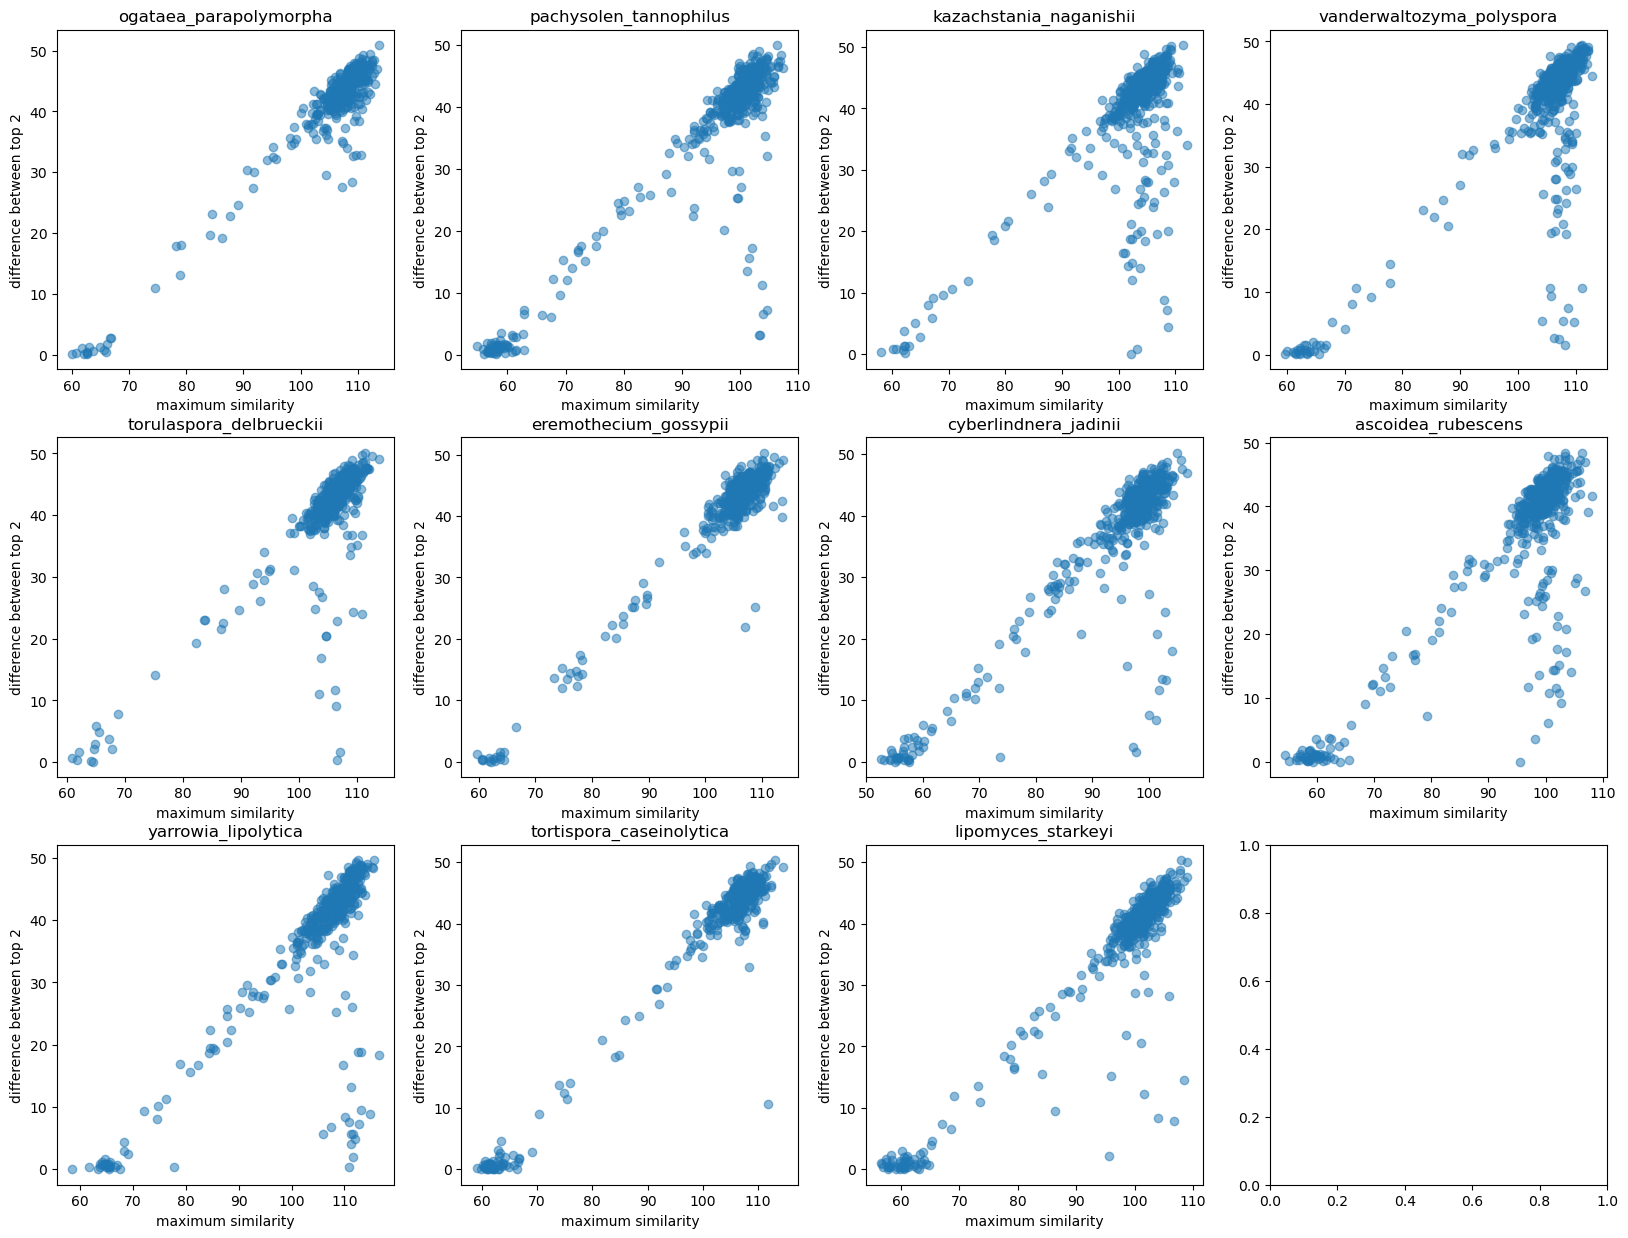

In [17]:
## Show histogram of the pairwise scores and use it to choose thresholds: 

fig, axarr = plt.subplots(3,4, figsize=(20,15))
#fig, ax = plt.subplots(1,1)

for jj, (spec_orig_genome, pairwise_score) in enumerate(pairwise_scores.items()):

#spec_orig_genome = 'ogataea_parapolymorpha'
    ax = axarr.flatten()[jj]
    maxvals = []
    diff_top2 = []
    for genename_shen, options in pairwise_score.items(): 
        options_sorted = options.sort_values()
        #idxmax = options.idxmax()
        maxval = options_sorted[-1]
        diff_top2_val = maxval-options_sorted[-2]
        diff_top2.append(diff_top2_val)
        maxvals.append(maxval)
        #if maxval<90: 
        #if (maxval>90) & (diff_top2_val<20):
        #   print('{}, maxval: {}, difference: {}'.format(genename_shen,maxval,diff_top2_val))


    ax.scatter(maxvals, diff_top2, alpha = 0.5)
    ax.set_title(spec_orig_genome)
    ax.set_xlabel('maximum similarity')
    ax.set_ylabel('difference between top 2')

In [20]:
sim_score_high_thresh = 75
sim_score_low_thresh = 60
sim_score_diff_thresh = 8

y1000plus_dir = os.path.normpath('C:/Users/bheineike/Documents/GitHub/y1000plus_tools') + os.sep


for spec_orig_genome, pairwise_score in pairwise_scores.items():

    #spec_orig_genome = 'ogataea_parapolymorpha'


    #Read in shen protein IDs using fasta file header
    selected_proteins_fname_species = base_dir + os.sep +  os.path.normpath('selected_proteins/selected_proteins_by_species/' + spec_orig_genome + '__shen__selected_proteins.fasta')

    #Load map from full name to shen identifier 
    spec_lookup_fname = y1000plus_dir +  os.path.normpath('y1000plus_tools_data/y1000plus/id_lookups/' + spec_orig_genome + '.csv')
    spec_lookup = pd.read_csv(spec_lookup_fname, index_col=0)

    selected_proteins_shen = SeqIO.parse(selected_proteins_fname_species, "fasta")

    # pairwise_score_fname = base_dir + os.sep + os.path.normpath('selected_proteins/shen_uniprot_mapping/pairwise_score__'+spec_orig_genome+ '.pkl')
    # # Load pairwise_score
    # with open(pairwise_score_fname, 'rb') as f: 
    #     pairwise_score = pickle.load(f)


    #Output is a csv with y1000 gene_id, gene_full, y1000_id, and uniprot_id if present. 
    fname_out = base_dir + os.sep + os.path.normpath('/selected_proteins/shen_uniprot_mapping/y1000_id_2_uniprot_id_' + spec_orig_genome + '.csv')

    with open(fname_out, 'w') as f_out: 
        for record_shen in selected_proteins_shen: 
            #check_gene = False
            gene_full = record_shen.description.split()[3].split('=')[1] 

            spec_lookup_row = spec_lookup[spec_lookup['gene_full']==gene_full]
            assert len(spec_lookup_row) == 1, 'No single match for ' + gene_full
            gene_id = spec_lookup_row.index[0]
            y1000_id = spec_lookup_row['y1000_id'][gene_id]

            scores = pairwise_score[gene_full]
            scores_sorted = scores.sort_values(ascending=False)
            maxval = scores_sorted[0]
            diff_top2_val = maxval - scores_sorted[1]

            if ((maxval>sim_score_high_thresh) | ((maxval>sim_score_low_thresh) & (diff_top2_val>sim_score_diff_thresh))): 
                uniprot_id = scores_sorted.index[0].split('|')[1]  #The id looks like tr|<ID>|<name_specabbrev>, so we only extract the middle id

            else: 
                #f_log.write('No clear uniprot match: ' + shen_full)
                uniprot_id = None

            f_out.write('{},{},{},{}\n'.format(gene_id,gene_full,y1000_id, uniprot_id))

C:\Users\bheineike\AppData\Local\Temp\ipykernel_15804\2627455229.py:43: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  maxval = scores_sorted[0]
C:\Users\bheineike\AppData\Local\Temp\ipykernel_15804\2627455229.py:44: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  diff_top2_val = maxval - scores_sorted[1]
C:\Users\bheineike\AppData\Local\Temp\ipykernel_15804\2627455229.py:43: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  maxval = score